In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import pandasql as ps
import calendar

In [2]:
# Import data
sales=pd.read_csv('/Users/apple/Desktop/python side project/Namesake/sales_data.csv')
items=pd.read_csv('/Users/apple/Desktop/python side project/Namesake/items_bought.csv')

# Rename sales data column name
sales.rename(columns={'customer_id_random':'customer_id','order_id_random':'order_id','net_sales_scaled':'net_sales'},inplace=True)

In [5]:
# Show sales data
sales.head()

,datetime,customer_id,order_id,net_sales
0,2023-07-22,4794497084,4472634531,8.79
1,2023-07-23,2163752822,6055468369,13.39
2,2023-08-05,2163752822,7486174375,14.50
3,2023-08-14,8872646774,6199640363,9.96
4,2023-08-06,605622184,1616493641,11.50


In [6]:
# Show items data
items.head()

,customer_id_random,product_type,net_sales_scaled
0,808706493,23,3.62
1,2762797853,22,3.75
2,2762797853,12,3.40
3,2762797853,16,1.78
4,2762797853,11,5.22


# EDA for sales data

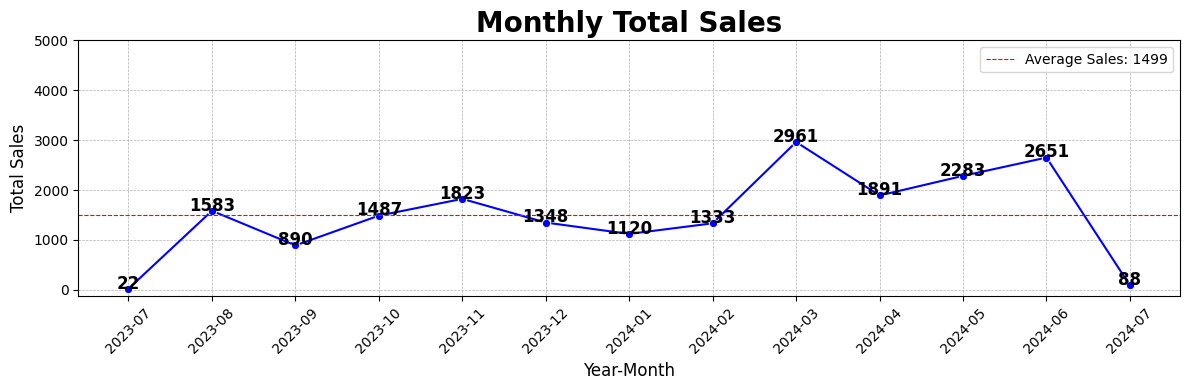

In [7]:
# Monthly Net Sales Analysis
sales['datetime']=pd.to_datetime(sales['datetime'])
query = """
    SELECT 
        strftime('%Y-%m', datetime) AS year_month,  -- Extract year and month (YYYY-MM)
        SUM(net_sales) AS total_sales
    FROM 
        sales
    GROUP BY 
        year_month
    ORDER BY 
        year_month
"""

# Execute the SQL query using pandasql
monthly_sales = ps.sqldf(query, locals())

# Convert `year_month` to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plot lineplot
plt.figure(figsize=(12, 4))  
sns.lineplot(x='year_month', y='total_sales', data=monthly_sales, marker='o', color='b')
for x, y in zip(monthly_sales['year_month'], monthly_sales['total_sales']):
    plt.text(x, y + 3, f'{int(y)}', ha='center', fontsize=12, color='black', weight='bold')
plt.title('Monthly Total Sales', fontsize=20, weight='bold')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(range(0, 5200, 1000))
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.axhline(monthly_sales['total_sales'].mean(), color='red', linestyle='--', linewidth=0.8, label=f'Average Sales: {monthly_sales['total_sales'].mean():.0f}')
plt.legend()

The graph shows monthly total sales from July 2023 to July 2024, with significant fluctuations. Peaks occurred in March 2024 (2,961 units) and June 2024 (2,651 units), while the lowest sales were in July 2023 (22 units) and July 2024 (88 units). Several months fell below the average of 1,499 units, indicating possible seasonal trends.